In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

def detect_outliers_t(x, k=3):
    '''Detect outliers by fitting t distribution to data.
    Args:
        x: np.array of data
        k: Exclude points within ±k×s of mean.
    Returns:
        is_outlier: np.array indicating whether each point is an outlier
        outlier_pars: dict of paramters of t distribution
    '''
    t_df, t_m, t_s = stats.t.fit(x)
    is_outlier = np.abs(x - t_m) > k * t_s
    outlier_pars = {
        'm': t_m, 's': t_s, 'df': t_df, 'p_outlier': np.mean(is_outlier), 'k': k
    }
    return is_outlier, outlier_pars

Outliers:
Number of outliers: 13
[0.25511952 0.11657762]


/tmp/ipykernel_3791353/3848758097.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  [x.columns[i] for i in range(len(x.columns)) if is_outlier.loc[row.name][i]], axis=1)


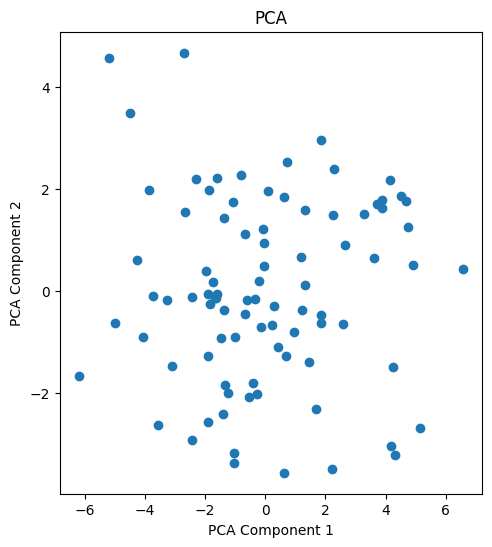

In [17]:
import sklearn.decomposition


df = pd.read_csv('data/final_datasets/final_experiment_participants_extended.csv')
x = df.drop(['Subject', 'AnswerAccuracySimple', 'AnswerAccuracyComplex', 'AnswerAccuracyUnambiguous', 'AnswerAccuracy'], axis=1)
x_mean = x.mean()
x_std = x.std()
# find outliers
is_outlier = (x - x_mean).abs() > 3 * x_std
# print amount of outliers
print('Outliers:')
print('Number of outliers:', np.sum(is_outlier.any(axis=1)))
outliers = df[is_outlier.any(axis=1)]
df['outlier_cause'] = df.apply(lambda row: 'None' if not is_outlier.loc[row.name].any() else 
                               [x.columns[i] for i in range(len(x.columns)) if is_outlier.loc[row.name][i]], axis=1)
outliers = df[is_outlier.any(axis=1)]
x = x[~is_outlier.any(axis=1)]
df = df[~is_outlier.any(axis=1)]
pca = sklearn.decomposition.PCA(n_components=2)
x = (x - x.mean()) / x.std()
x_pca = pca.fit_transform(x)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x_pca[:, 0], x_pca[:, 1])
plt.title('PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
print(pca.explained_variance_ratio_)

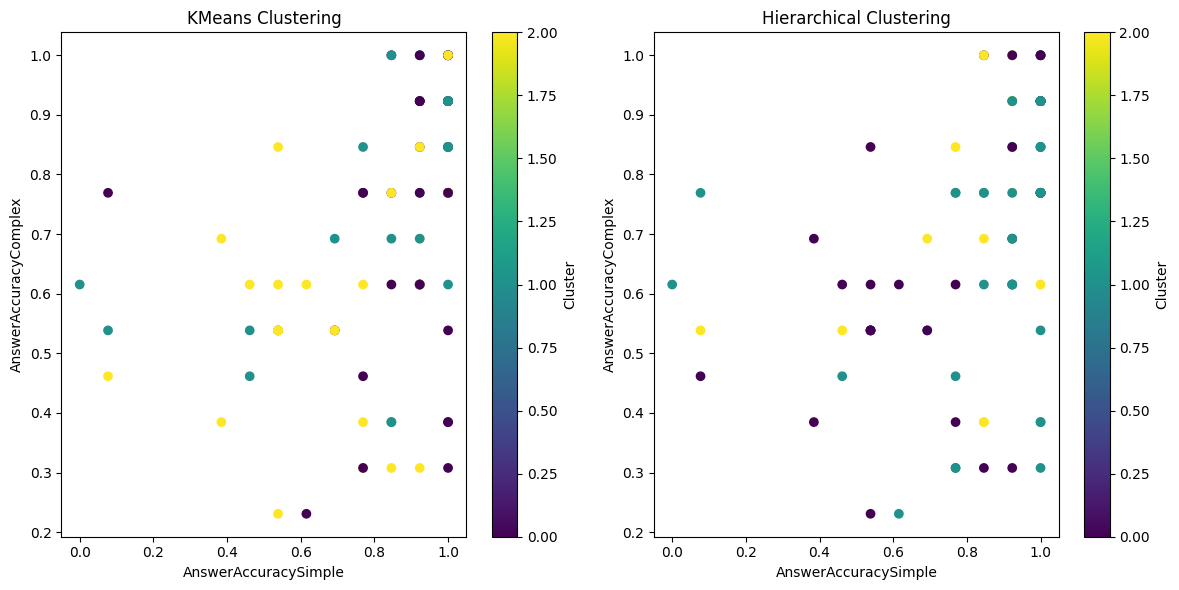

In [15]:

import sklearn.cluster
import sklearn.mixture


kmeans = sklearn.cluster.KMeans(n_clusters=3, random_state=0).fit(x)
hierarchical = sklearn.cluster.AgglomerativeClustering(n_clusters=3).fit(x)
gmm = sklearn.mixture.GaussianMixture(n_components=3, random_state=0).fit(x)
# visualize the clusters for different methods
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df['AnswerAccuracySimple'], df['AnswerAccuracyComplex'], c=kmeans.labels_, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('AnswerAccuracySimple')
plt.ylabel('AnswerAccuracyComplex')
plt.colorbar(label='Cluster')
plt.subplot(1, 2, 2)
plt.scatter(df['AnswerAccuracySimple'], df['AnswerAccuracyComplex'], c=hierarchical.labels_, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('AnswerAccuracySimple')
plt.ylabel('AnswerAccuracyComplex')
plt.colorbar(label='Cluster')
plt.tight_layout()
cs = gmm.predict(x)
# plt.scatter(df['AnswerAccuracySimple'], df['AnswerAccuracyComplex'], c=cs, cmap='viridis')
# plt.title('GMM Clustering')
# plt.xlabel('AnswerAccuracySimple')
# plt.ylabel('AnswerAccuracyComplex')
# plt.colorbar(label='Cluster')
plt.show()

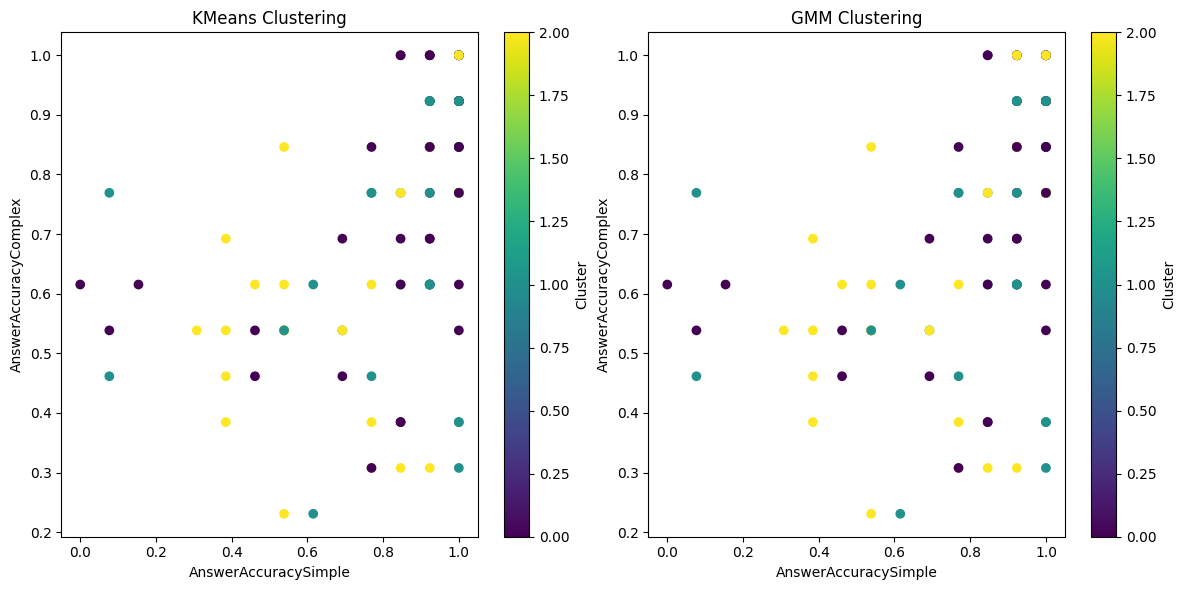

In [8]:

x = (x - x.mean()) / x.std()
kmeans = sklearn.cluster.KMeans(n_clusters=3, random_state=0).fit(x)
hierarchical = sklearn.cluster.AgglomerativeClustering(n_clusters=3).fit(x)
gmm = sklearn.mixture.GaussianMixture(n_components=3, random_state=0).fit(x)
# visualize the clusters for different methods
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df['AnswerAccuracySimple'], df['AnswerAccuracyComplex'], c=kmeans.labels_, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('AnswerAccuracySimple')
plt.ylabel('AnswerAccuracyComplex')
plt.colorbar(label='Cluster')
plt.subplot(1, 2, 2)
# plt.scatter(df['AnswerAccuracySimple'], df['AnswerAccuracyComplex'], c=hierarchical.labels_, cmap='viridis')
# plt.title('Hierarchical Clustering')
# plt.xlabel('AnswerAccuracySimple')
# plt.ylabel('AnswerAccuracyComplex')
# plt.colorbar(label='Cluster')
plt.tight_layout()
cs = gmm.predict(x)
plt.scatter(df['AnswerAccuracySimple'], df['AnswerAccuracyComplex'], c=cs, cmap='viridis')
plt.title('GMM Clustering')
plt.xlabel('AnswerAccuracySimple')
plt.ylabel('AnswerAccuracyComplex')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
outliers

,PropTimeOnSentMsg,PropTimeOnSentMsgSimple,PropTimeOnSentMsgComplex,PropTimeOnSentMsgUnambiguous,PropTimeOnAvailableMsgs,PropTimeOnAvailableMsgsSimple,PropTimeOnAvailableMsgsComplex,PropTimeOnAvailableMsgsUnambiguous,PropTimeOnTrgt,PropTimeOnTrgtSimple,...,PropTimeOnCompComplex,PropTimeOnCompUnambiguous,PropTimeOnNonAOI,PropTimeOnNonAOISimple,PropTimeOnNonAOIComplex,PropTimeOnNonAOIUnambiguous,MeanAnswerTime,MeanAnswerTimeSimple,MeanAnswerTimeComplex,MeanAnswerTimeUnambiguous
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
97,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
98,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
99,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True


In [5]:
x_mean

np.float64(-4.3969228698026e-18)